# 7.11 실행하기

# 7.11.1 구현 파일 실행시키기

In [1]:
%run ../chap07/cnn_basic_model.ipynb
%run ../chap05/dataset_flowers.ipynb
%run ../chap06/dataset_office31.ipynb

## 7.11.2 실험용 데이터셋 객체 생성

In [2]:
fd = FlowersDataset([96, 96], [96, 96, 3]) # 이미지 해상도를 96으로 하여 여러 단계의 풀링 게층을 거치면서 짜투리 없는 분할이 쉽도록 함
od = Office31Dataset([96, 96], [96, 96, 3]) # 실제 학습 때는 미니배치 차원이 추가되어 4차원 텐서가 됨

## 7.11.3 확장된 모델로 다층 퍼셉트론 신경망 만들어보기

Model flowers_model_1 train started:
     Epoch 2: cost=1.460, accuracy=0.320/0.360 (17/17 secs)
     Epoch 4: cost=1.467, accuracy=0.313/0.330 (16/33 secs)
     Epoch 6: cost=1.431, accuracy=0.348/0.310 (15/48 secs)
     Epoch 8: cost=1.457, accuracy=0.326/0.300 (16/64 secs)
     Epoch 10: cost=1.403, accuracy=0.358/0.240 (16/80 secs)
Model flowers_model_1 train ended in 80 secs:
Model flowers_model_1 test report: accuracy = 0.311, (0 secs)

Model flowers_model_1 Visualization


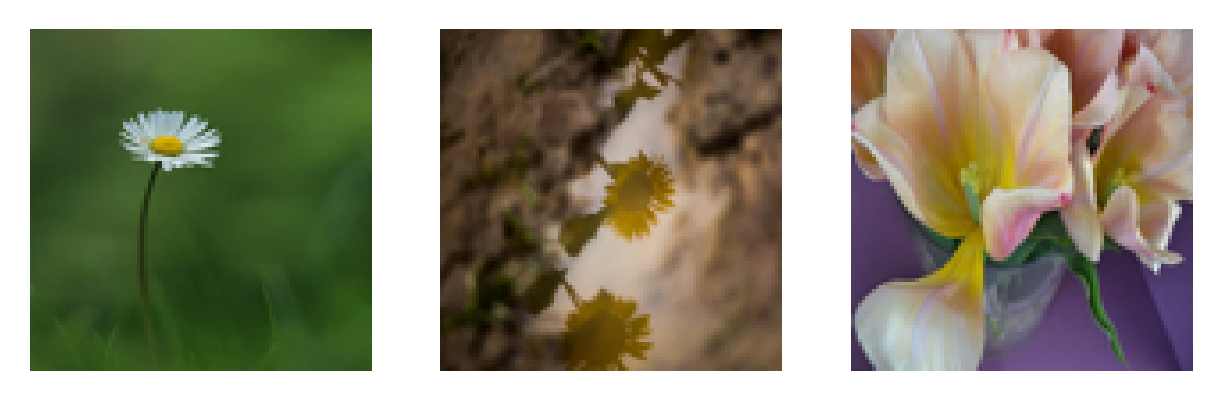

추정확률 분포 [100, 0, 0, 0, 0] => 추정 daisy : 정답 daisy => O
추정확률 분포 [ 0, 0, 0,100, 0] => 추정 sunflower : 정답 sunflower => O
추정확률 분포 [ 0, 0, 0, 0,100] => 추정 tulip : 정답 tulip => O


In [3]:
fm1 = CnnBasicModel('flowers_model_1', fd, [30, 10])
fm1.exec_all(epoch_count = 10, report = 2)

## 7.11.4 완전 연결 계층 구성 정보의 명시적 표현과 아담 알고리즘의 해제

Model flowers_model_2 train started:
     Epoch 2: cost=1.599, accuracy=0.259/0.270 (5/5 secs)
     Epoch 4: cost=1.524, accuracy=0.315/0.290 (5/10 secs)
     Epoch 6: cost=1.361, accuracy=0.397/0.360 (5/15 secs)
     Epoch 8: cost=1.308, accuracy=0.409/0.430 (5/20 secs)
     Epoch 10: cost=1.243, accuracy=0.454/0.350 (4/24 secs)
Model flowers_model_2 train ended in 24 secs:
Model flowers_model_2 test report: accuracy = 0.388, (0 secs)

Model flowers_model_2 Visualization


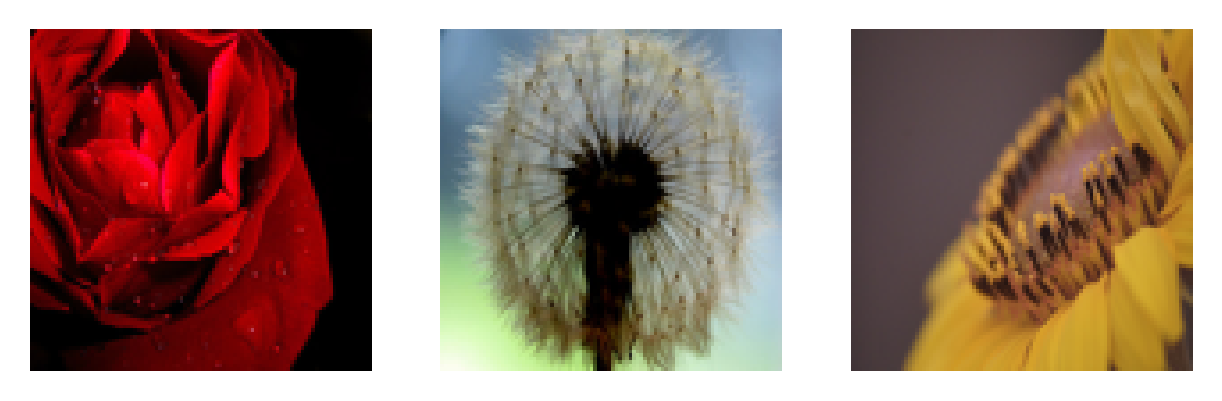

추정확률 분포 [ 0, 0,100, 0, 0] => 추정 rose : 정답 rose => O
추정확률 분포 [ 0,100, 0, 0, 0] => 추정 dandelion : 정답 dandelion => O
추정확률 분포 [ 0, 0, 0,100, 0] => 추정 sunflower : 정답 sunflower => O


In [4]:
fm2 = CnnBasicModel('flowers_model_2', fd,
                   [['full', {'width': 30}],
                   ['full', {'width': 10}]])
fm2.use_adam = False
fm2.exec_all(epoch_count = 10, report = 2)

## 7.11.5 간단한 합성곱 신경망을 이용한 꽃 이미지 분류 신경망

Model flowers_model_3 train started:
     Epoch 2: cost=1.165, accuracy=0.546/0.550 (101/101 secs)
     Epoch 4: cost=0.957, accuracy=0.634/0.530 (101/202 secs)
     Epoch 6: cost=0.820, accuracy=0.691/0.530 (100/302 secs)
     Epoch 8: cost=0.690, accuracy=0.737/0.560 (101/403 secs)
     Epoch 10: cost=0.593, accuracy=0.780/0.520 (100/503 secs)
Model flowers_model_3 train ended in 503 secs:
Model flowers_model_3 test report: accuracy = 0.543, (3 secs)

Model flowers_model_3 Visualization


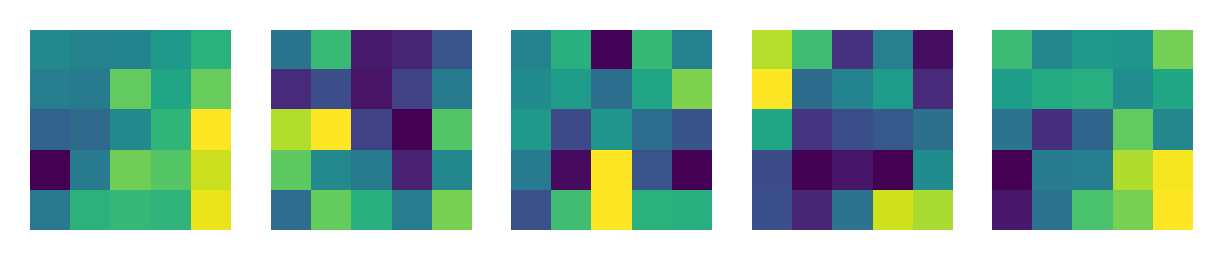

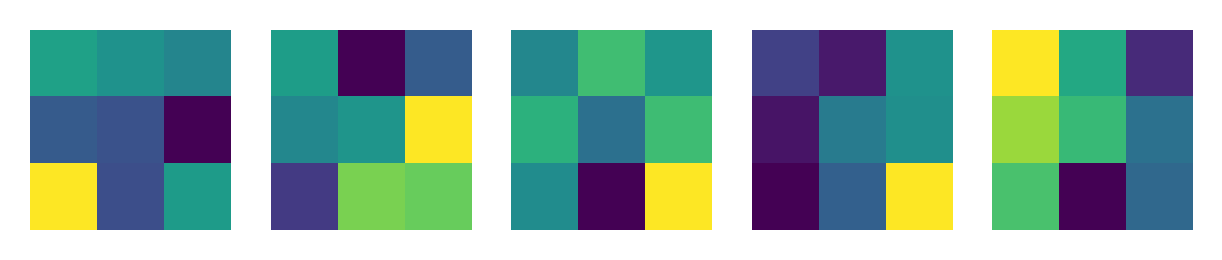

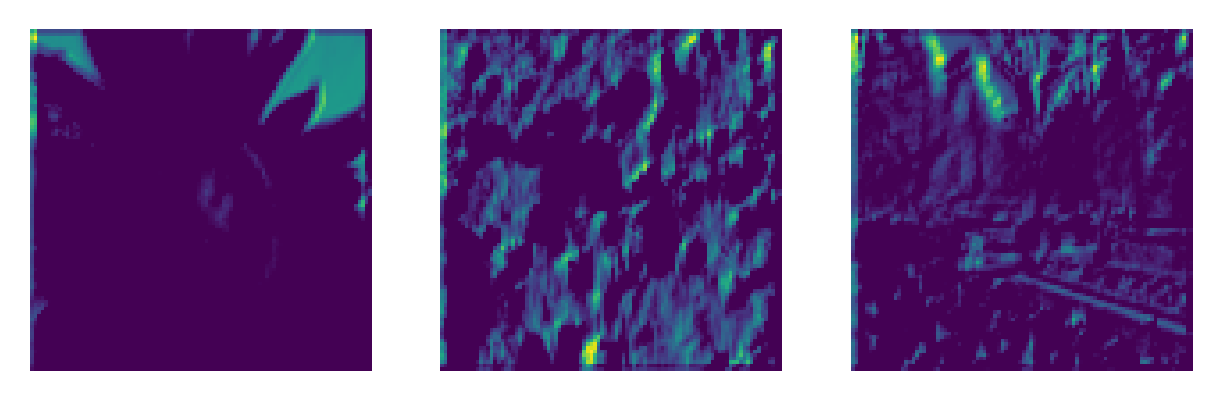

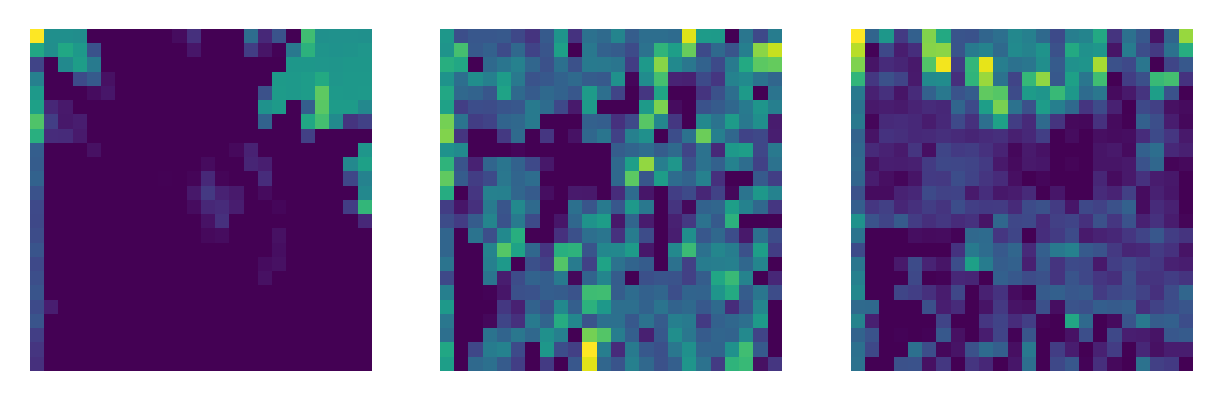

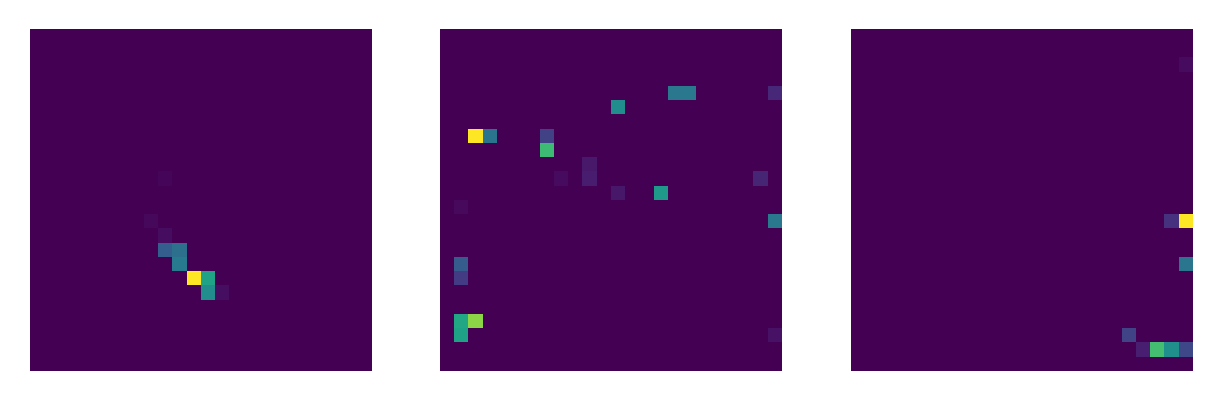

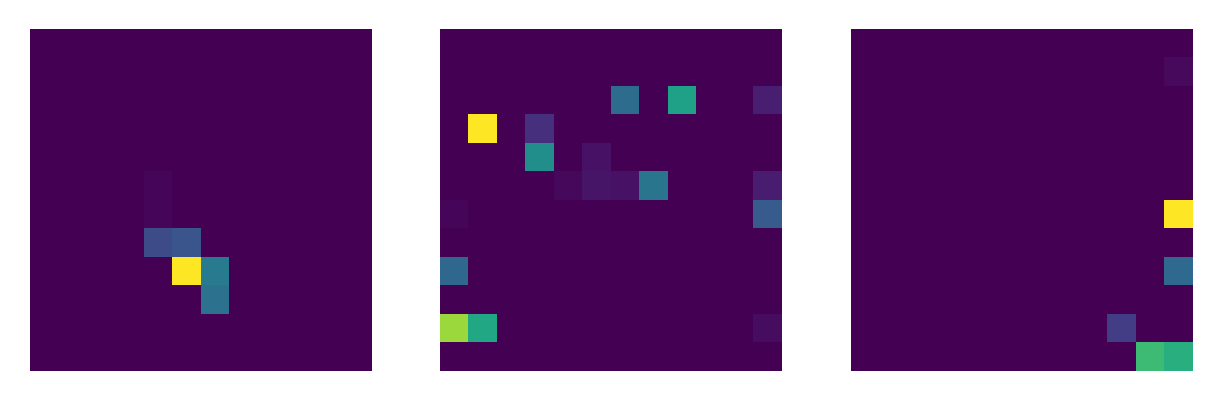

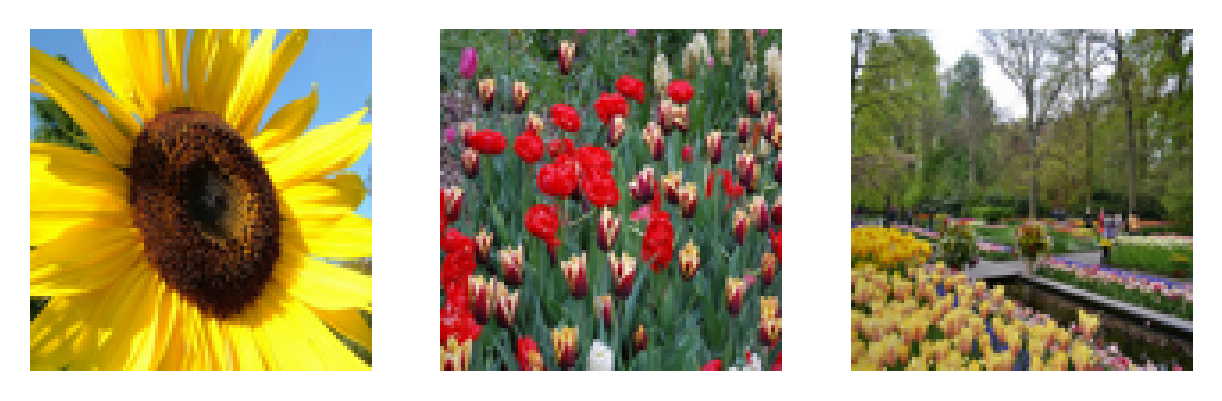

추정확률 분포 [ 0, 0, 0,100, 0] => 추정 sunflower : 정답 sunflower => O
추정확률 분포 [ 0, 0, 0, 0,100] => 추정 tulip : 정답 tulip => O
추정확률 분포 [ 0, 0, 0, 0,100] => 추정 tulip : 정답 tulip => O


In [3]:
fm3 = CnnBasicModel('flowers_model_3', fd,
                   [['conv', {'ksize':5, 'chn':6}],
                   ['max', {'stride':4}],
                   ['conv', {'ksize':3, 'chn':12}],
                   ['avg', {'stride':2}]],
                   True)
fm3.exec_all(epoch_count = 10, report = 2)

## 7.11.6 좀 더 많은 계층을 갖는 합성곱 신경망을 이용한 꽃 이미지 분류 신경망

Model flowers_model_4 train started:
     Epoch 2: cost=1.049, accuracy=0.595/0.550 (93/93 secs)
     Epoch 4: cost=0.872, accuracy=0.668/0.630 (93/186 secs)
     Epoch 6: cost=0.767, accuracy=0.709/0.650 (93/279 secs)
     Epoch 8: cost=0.657, accuracy=0.749/0.590 (93/372 secs)
     Epoch 10: cost=0.551, accuracy=0.791/0.720 (93/465 secs)
Model flowers_model_4 train ended in 465 secs:
Model flowers_model_4 test report: accuracy = 0.626, (2 secs)

Model flowers_model_4 Visualization


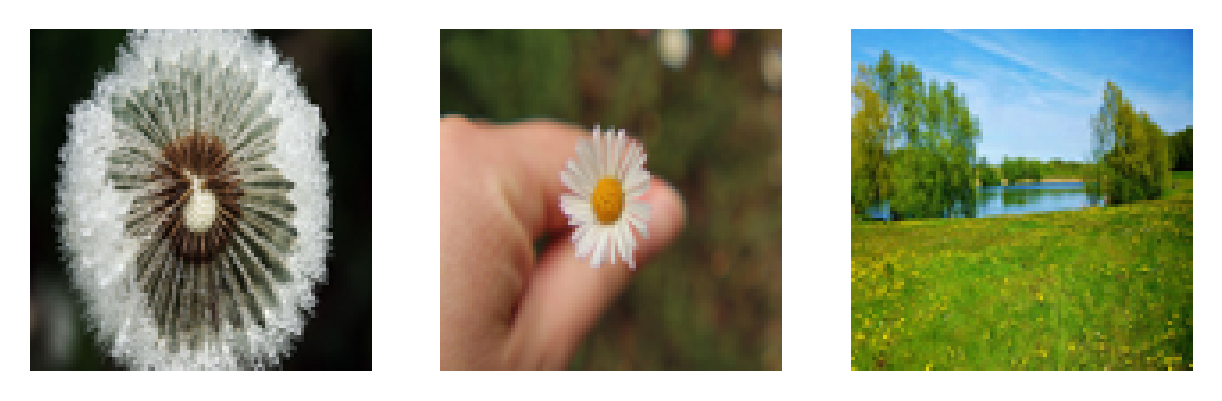

추정확률 분포 [ 0,100, 0, 0, 0] => 추정 dandelion : 정답 dandelion => O
추정확률 분포 [100, 0, 0, 0, 0] => 추정 daisy : 정답 daisy => O
추정확률 분포 [ 0,100, 0, 0, 0] => 추정 dandelion : 정답 dandelion => O


In [4]:
fm4 = CnnBasicModel('flowers_model_4', fd,
                   [['conv', {'ksize':3, 'chn':6}],
                   ['max', {'stride':2}],
                   ['conv', {'ksize':3, 'chn':12}],
                   ['max', {'stride':2}],
                   ['conv', {'ksize':3, 'chn':24}],
                   ['avg', {'stride':3}]])
fm4.exec_all(epoch_count = 10, report = 2)

## 7.11.7 같은 구성의 합성곱 신경망을 이용한 오피스31 다차원 분류 신경망

Model office31_model_1 train started:
    Epoch 2: cost=2.822,accuracy=0.834+0.346/0.820+0.300 (89/89 secs)
    Epoch 4: cost=1.908,accuracy=0.898+0.544/0.850+0.530 (90/179 secs)
    Epoch 6: cost=1.288,accuracy=0.932+0.691/0.880+0.510 (89/268 secs)
    Epoch 8: cost=0.830,accuracy=0.950+0.798/0.920+0.500 (89/357 secs)
    Epoch 10: cost=0.565,accuracy=0.949+0.875/0.860+0.480 (89/446 secs)
Model office31_model_1 train ended in 446 secs:
Model office31_model_1 test report: accuracy = 0.886+0.486, (2 secs)

Model office31_model_1 Visualization


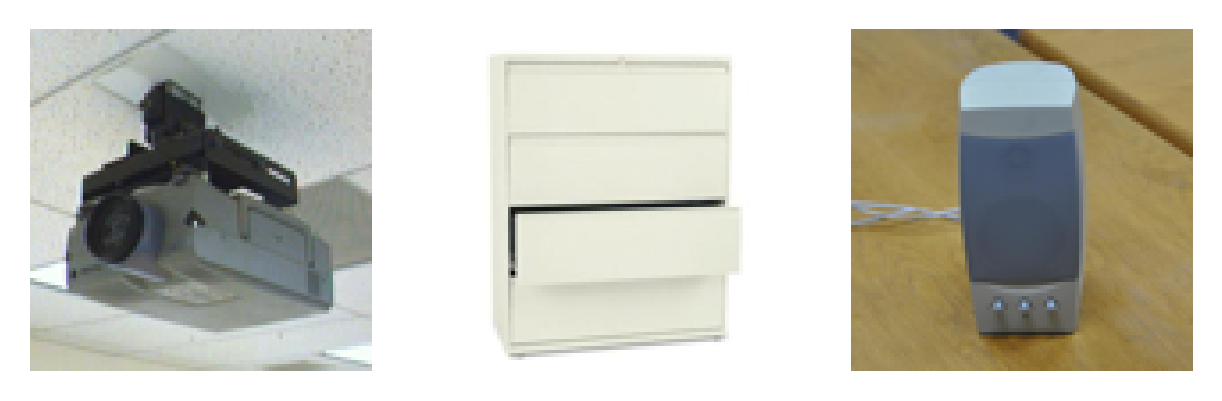

[ 도메인 추정결과 ]
추정확률 분포 [ 0, 0,100] => 추정 webcam : 정답 webcam => O
추정확률 분포 [100, 0, 0] => 추정 amazon : 정답 amazon => O
추정확률 분포 [ 0,100, 0] => 추정 dslr : 정답 dslr => O
[ 상품 추정결과 ]
추정확률 분포 [ 0, 0, 0, 0, 0, 0, 0, 0,...] => 추정 projector : 정답 projector => O
추정확률 분포 [ 0, 0, 0, 0, 0, 0, 0, 0,...] => 추정 file_cabinet : 정답 file_cabinet => O
추정확률 분포 [ 0, 0, 0, 0, 0, 0, 0, 0,...] => 추정 speaker : 정답 speaker => O


In [6]:
om1 = CnnBasicModel('office31_model_1', od,
                   [['conv', {'ksize':3, 'chn':6}],
                   ['max', {'stride':2}],
                   ['conv', {'ksize':3, 'chn':12}],
                   ['max', {'stride': 2}],
                   ['conv', {'ksize':3, 'chn':24}],
                   ['avg', {'stride':3}]])
om1.exec_all(epoch_count = 10, report = 2)

## 7.11.8 오피스31 문제를 위한 합성곱 신경망의 학습 횟수 늘려보기

In [7]:
om1.exec_all(epoch_count = 40, show_cnt = 0)

Model office31_model_1 train ended in 1777 secs:
Model office31_model_1 test report: accuracy = 0.899+0.509, (2 secs)



## 7.11.9 시그모이드 함수를 비선형 활성화 함수로 이용해보기

Model office31_model_2 train started:
    Epoch 2: cost=4.272,accuracy=0.686+0.037/0.680+0.030 (100/100 secs)
    Epoch 4: cost=4.244,accuracy=0.686+0.041/0.620+0.030 (101/201 secs)
    Epoch 6: cost=4.117,accuracy=0.686+0.096/0.700+0.150 (100/301 secs)
    Epoch 8: cost=3.567,accuracy=0.711+0.243/0.630+0.130 (101/402 secs)
    Epoch 10: cost=3.253,accuracy=0.752+0.302/0.670+0.220 (101/503 secs)
Model office31_model_2 train ended in 503 secs:
Model office31_model_2 test report: accuracy = 0.709+0.256, (3 secs)

Model office31_model_2 Visualization


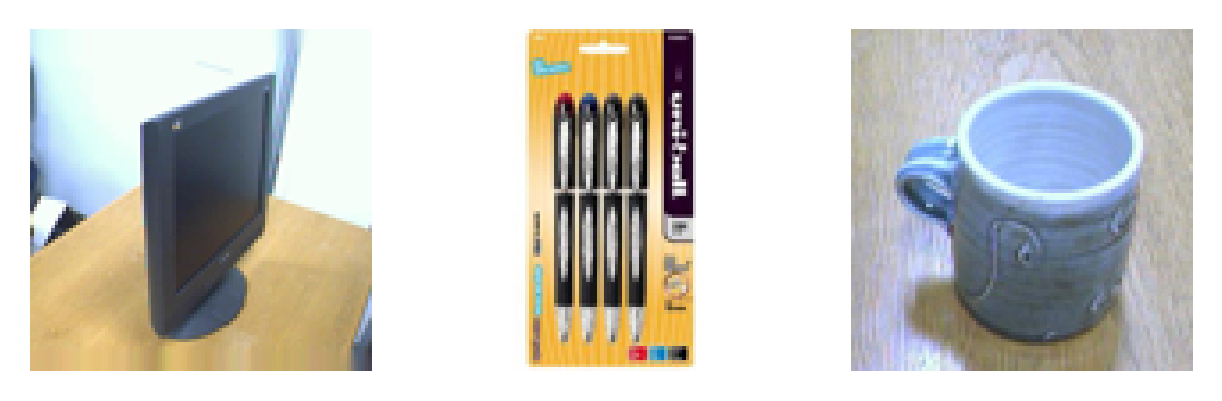

[ 도메인 추정결과 ]
추정확률 분포 [ 0, 0,100] => 추정 webcam : 정답 webcam => O
추정확률 분포 [100, 0, 0] => 추정 amazon : 정답 amazon => O
추정확률 분포 [ 0, 0,100] => 추정 webcam : 정답 webcam => O
[ 상품 추정결과 ]
추정확률 분포 [ 0, 0, 0, 0, 0, 0, 0, 0,...] => 추정 monitor : 정답 monitor => O
추정확률 분포 [ 0, 0, 0, 0, 0, 0, 0, 0,...] => 추정 pen : 정답 pen => O
추정확률 분포 [ 0, 0, 0, 0, 0, 0, 0, 0,...] => 추정 mug : 정답 mug => O


In [8]:
om2 = CnnBasicModel('office31_model_2', od,
                   [['conv', {'ksize':3, 'chn':6, 'actfunc':'sigmoid'}],
                   ['max', {'stride':2}],
                   ['conv', {'ksize':3, 'chn':12, 'actfunc':'sigmoid'}],
                   ['max', {'stride': 2}],
                   ['conv', {'ksize':3, 'chn':24, 'actfunc':'sigmoid'}], 
                   ['avg', {'stride':3}]])
om2.exec_all(epoch_count = 10, report = 2)

## 7.11.10 쌍곡탄젠트 함수를 비선형 활성화 함수로 이용해보기

Model office31_model_3 train started:
    Epoch 2: cost=3.367,accuracy=0.706+0.301/0.710+0.290 (104/104 secs)
    Epoch 4: cost=2.989,accuracy=0.721+0.387/0.680+0.330 (104/208 secs)
    Epoch 6: cost=3.461,accuracy=0.717+0.245/0.680+0.240 (104/312 secs)
    Epoch 8: cost=2.951,accuracy=0.791+0.339/0.810+0.390 (103/415 secs)
    Epoch 10: cost=2.405,accuracy=0.842+0.460/0.710+0.370 (104/519 secs)
Model office31_model_3 train ended in 519 secs:
Model office31_model_3 test report: accuracy = 0.781+0.320, (3 secs)

Model office31_model_3 Visualization


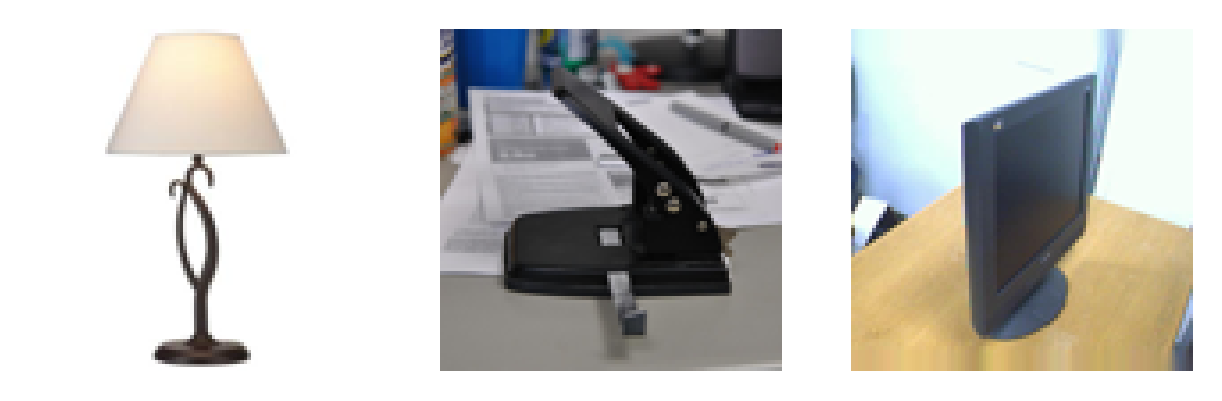

[ 도메인 추정결과 ]
추정확률 분포 [100, 0, 0] => 추정 amazon : 정답 amazon => O
추정확률 분포 [ 0,100, 0] => 추정 dslr : 정답 dslr => O
추정확률 분포 [ 0, 0,100] => 추정 webcam : 정답 webcam => O
[ 상품 추정결과 ]
추정확률 분포 [ 0, 0, 0, 0, 0, 0, 0,100,...] => 추정 desk_lamp : 정답 desk_lamp => O
추정확률 분포 [ 0, 0, 0, 0, 0, 0, 0, 0,...] => 추정 punchers : 정답 punchers => O
추정확률 분포 [ 0, 0, 0, 0, 0, 0, 0, 0,...] => 추정 monitor : 정답 monitor => O


In [9]:
om3 = CnnBasicModel('office31_model_3', od,
                   [['conv', {'ksize':3, 'chn':6, 'actfunc':'tanh'}],
                   ['max', {'stride':2}],
                   ['conv', {'ksize':3, 'chn':12, 'actfunc':'tanh'}],
                   ['max', {'stride': 2}],
                   ['conv', {'ksize':3, 'chn':24, 'actfunc':'tanh'}], 
                   ['avg', {'stride':3}]])
om3.exec_all(epoch_count = 10, report = 2)